In [1]:
import numpy  as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
test_data=pd.read_csv("test_AbJTz2l.csv")

In [3]:
train_data=pd.read_csv("train_v9rqX0R.csv")

In [4]:
#Pre- Processing train data
train_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [5]:
train_data.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [6]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [7]:
train_data.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [8]:
#Item_Weight has 1463 and Outlet_Size has 2410 missing values

In [9]:
#Visualisation

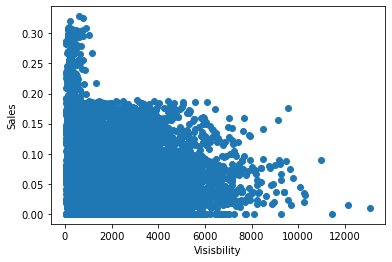

In [10]:
plt.scatter(train_data["Item_Outlet_Sales"],train_data["Item_Visibility"])
plt.xlabel("Visisbility")
plt.ylabel("Sales")
plt.show()

In [11]:
#Items having visibility less than 0.2 sold the most

In [12]:
#Data Cleaning

In [13]:
train_data.Item_Fat_Content.value_counts() #mismatched factor levels

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [14]:
train_data.Item_Visibility.value_counts().head() # visibility cannot be 0

0.000000    526
0.076975      3
0.162462      2
0.076841      2
0.073562      2
Name: Item_Visibility, dtype: int64

In [15]:
train_data.Outlet_Size.value_counts()#mismatched couts

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

Inference
1.Item_Fat_Content has mismatched factor levels
2.Min(Item_visibility) = 0. Not practically possible. Treat 0's as missing values
3.Item_weight has 1463 missing values
4.Outlet_Size has unmatched factor levels

In [16]:
#Data Preprocessing

In [17]:
med=train_data["Item_Weight"].mean()
train_data["Item_Weight"]=train_data["Item_Weight"].fillna(med)

In [18]:
# Replacing 0's with NaN
train_data.Item_Visibility.replace(to_replace=0.000000,value=np.NaN,inplace=True)
# Now fill by mean of visbility based on item identifiers
train_data.Item_Visibility = train_data.Item_Visibility.fillna(train_data.groupby('Item_Identifier')['Item_Visibility'].transform('mean'))
# Checking if Imputation was carried out successfully
train_data.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [19]:
crosstable = pd.crosstab(train_data['Outlet_Size'],train_data['Outlet_Type'])
crosstable

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Size,,,,
High,0,932,0,0
Medium,0,930,928,935
Small,528,1860,0,0


In [20]:
dic = {'Grocery Store':'Small'}
s = train_data.Outlet_Type.map(dic)
train_data.Outlet_Size= train_data.Outlet_Size.combine_first(s)
train_data.Outlet_Size.value_counts()

Small     2943
Medium    2793
High       932
Name: Outlet_Size, dtype: int64

In [21]:
#From the above table it is evident that all the Tier 2 stores are of small types. Therefore mapping Tier 2 store and small size

In [22]:
dic = {"Tier 2":"Small"}
s = train_data.Outlet_Location_Type.map(dic)
train_data.Outlet_Size = train_data.Outlet_Size.combine_first(s)
train_data.isnull().sum(axis=0)

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [23]:
train_data.head(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300000,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920000,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500000,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200000,Regular,0.022911,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800
4,NCD19,8.930000,Low Fat,0.016164,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395000,Regular,0.091392,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650000,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
7,FDP10,12.857645,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,FDH17,16.200000,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,Small,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200000,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,Small,Tier 2,Supermarket Type1,4710.5350


In [24]:
#Encoding

In [25]:
train_data.Item_Fat_Content.value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [26]:
train_data.Item_Fat_Content.replace(to_replace=["LF","low fat"],value="Low Fat",inplace=True)
train_data.Item_Fat_Content.replace(to_replace="reg",value="Regular",inplace=True)

train_data.Item_Fat_Content.value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [27]:
#Encoding Categorical Variables
train_data.columns


Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [28]:
train_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.022911,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.016164,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [29]:
from sklearn.preprocessing import LabelEncoder
lb1=LabelEncoder()
train_data["Item_Type"]=lb1.fit_transform(train_data["Item_Type"])


In [30]:
from sklearn.preprocessing import LabelEncoder
lb2=LabelEncoder()
train_data["Item_Identifier"]=lb2.fit_transform(train_data["Item_Identifier"])

In [31]:
from sklearn.preprocessing import LabelEncoder
lb3=LabelEncoder()
train_data["Item_Fat_Content"]=lb3.fit_transform(train_data["Item_Fat_Content"])

In [32]:
from sklearn.preprocessing import LabelEncoder
lb4=LabelEncoder()
train_data["Outlet_Identifier"]=lb4.fit_transform(train_data["Outlet_Identifier"])

In [33]:
from sklearn.preprocessing import LabelEncoder
lb5=LabelEncoder()
train_data["Outlet_Size"]=lb5.fit_transform(train_data["Outlet_Size"])


In [34]:
from sklearn.preprocessing import LabelEncoder
lb6=LabelEncoder()
train_data["Outlet_Location_Type"]=lb6.fit_transform(train_data["Outlet_Location_Type"])


In [35]:
from sklearn.preprocessing import LabelEncoder
lb7=LabelEncoder()
train_data["Outlet_Type"]=lb7.fit_transform(train_data["Outlet_Type"])

In [36]:
train_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.30,0,0.016047,4,249.8092,9,1999,1,0,1,3735.1380
1,8,5.92,1,0.019278,14,48.2692,3,2009,1,2,2,443.4228
2,662,17.50,0,0.016760,10,141.6180,9,1999,1,0,1,2097.2700
3,1121,19.20,1,0.022911,6,182.0950,0,1998,2,2,0,732.3800
4,1297,8.93,0,0.016164,9,53.8614,1,1987,0,2,1,994.7052


In [37]:
train_data["Item_Weight"].describe()

count    8523.000000
mean       12.857645
std         4.226124
min         4.555000
25%         9.310000
50%        12.857645
75%        16.000000
max        21.350000
Name: Item_Weight, dtype: float64

In [38]:
train_data["Item_MRP"].describe()

count    8523.000000
mean      140.992782
std        62.275067
min        31.290000
25%        93.826500
50%       143.012800
75%       185.643700
max       266.888400
Name: Item_MRP, dtype: float64

In [39]:
train_data["Item_Visibility"].describe()

count    8523.000000
mean        0.070749
std         0.050313
min         0.003575
25%         0.031395
50%         0.058100
75%         0.098867
max         0.328391
Name: Item_Visibility, dtype: float64

In [40]:
y=train_data["Item_Outlet_Sales"]

In [41]:
X=train_data.drop(["Item_Outlet_Sales"],axis=1)

In [42]:
X.shape

(8523, 11)

In [43]:
X.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,156,9.30,0,0.016047,4,249.8092,9,1999,1,0,1
1,8,5.92,1,0.019278,14,48.2692,3,2009,1,2,2
2,662,17.50,0,0.016760,10,141.6180,9,1999,1,0,1
3,1121,19.20,1,0.022911,6,182.0950,0,1998,2,2,0
4,1297,8.93,0,0.016164,9,53.8614,1,1987,0,2,1


In [44]:
X.dtypes

Item_Identifier                int32
Item_Weight                  float64
Item_Fat_Content               int32
Item_Visibility              float64
Item_Type                      int32
Item_MRP                     float64
Outlet_Identifier              int32
Outlet_Establishment_Year      int64
Outlet_Size                    int32
Outlet_Location_Type           int32
Outlet_Type                    int32
dtype: object

In [45]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=123)

In [46]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr=lr.fit(X_train,y_train)
y_pred=lr.predict(X_test)
print(y_pred)

[ 578.46036187 1596.74982365 3204.1207794  ... 1383.63822073 4077.32389419
 2904.62086812]


In [47]:
from sklearn.metrics import accuracy_score,mean_squared_error,r2_score
print(r2_score(y_test,y_pred))


0.515475167102315


In [97]:
#declare the ridge regression model
from sklearn.linear_model import Ridge
model=Ridge()
model=model.fit(X_train,y_train)
y_rid=model.predict(X_test)
print(y_rid)

[ 573.37149084 1596.08789208 3202.61287534 ... 1378.83343047 4073.83504773
 2903.78012056]


In [99]:
print(r2_score(y_test,y_rid))

0.5153904419747072


In [48]:
#Test Data processing

In [49]:
test_data=pd.read_csv("test_AbJTz2l.csv")
#Pre- Processing test data
test_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [50]:
test_data.isna().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [51]:
#Data Cleaning
test_data.Item_Fat_Content.value_counts() #mismatched factor levels

Low Fat    3396
Regular    1935
LF          206
reg          78
low fat      66
Name: Item_Fat_Content, dtype: int64

In [52]:
test_data.Item_Visibility.value_counts().head() # visibility cannot be 0

0.000000    353
0.060879      2
0.097213      2
0.058461      2
0.058132      2
Name: Item_Visibility, dtype: int64

In [53]:
test_data.Outlet_Size.value_counts()#mismatched couts

Medium    1862
Small     1592
High       621
Name: Outlet_Size, dtype: int64

In [54]:
#Data Preprocessing
med=test_data["Item_Weight"].mean()
test_data["Item_Weight"]=test_data["Item_Weight"].fillna(med)

In [55]:
# Replacing 0's with NaN
test_data.Item_Visibility.replace(to_replace=0.000000,value=np.NaN,inplace=True)
# Now fill by mean of visbility based on item identifiers
test_data.Item_Visibility = test_data.Item_Visibility.fillna(test_data.groupby('Item_Identifier')['Item_Visibility'].transform('mean'))
# Checking if Imputation was carried out successfully
test_data.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                13
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [56]:
men=test_data["Item_Visibility"].mean()
test_data["Item_Visibility"]=test_data["Item_Visibility"].fillna(men)

In [57]:
test_data.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [58]:
crosstable = pd.crosstab(test_data['Outlet_Size'],test_data['Outlet_Type'])
crosstable

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Size,,,,
High,0,621,0,0
Medium,0,620,618,624
Small,352,1240,0,0


In [59]:
dic = {'Grocery Store':'Small'}
s = test_data.Outlet_Type.map(dic)
test_data.Outlet_Size= test_data.Outlet_Size.combine_first(s)
test_data.Outlet_Size.value_counts()

Small     1962
Medium    1862
High       621
Name: Outlet_Size, dtype: int64

In [60]:
#From the above table it is evident that all the Tier 2 stores are of small types. Therefore mapping Tier 2 store and small size

In [61]:
dic = {"Tier 2":"Small"}
s = test_data.Outlet_Location_Type.map(dic)
test_data.Outlet_Size = test_data.Outlet_Size.combine_first(s)
test_data.isnull().sum(axis=0)

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

In [62]:
test_data.head(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750000,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300000,reg,0.038428,Dairy,87.3198,OUT017,2007,Small,Tier 2,Supermarket Type1
2,NCN55,14.600000,Low Fat,0.099575,Others,241.7538,OUT010,1998,Small,Tier 3,Grocery Store
3,FDQ58,7.315000,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,Small,Tier 2,Supermarket Type1
4,FDY38,12.695633,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3
5,FDH56,9.800000,Regular,0.063817,Fruits and Vegetables,117.1492,OUT046,1997,Small,Tier 1,Supermarket Type1
6,FDL48,19.350000,Regular,0.082602,Baking Goods,50.1034,OUT018,2009,Medium,Tier 3,Supermarket Type2
7,FDC48,12.695633,Low Fat,0.015782,Baking Goods,81.0592,OUT027,1985,Medium,Tier 3,Supermarket Type3
8,FDN33,6.305000,Regular,0.123365,Snack Foods,95.7436,OUT045,2002,Small,Tier 2,Supermarket Type1
9,FDA36,5.985000,Low Fat,0.005698,Baking Goods,186.8924,OUT017,2007,Small,Tier 2,Supermarket Type1


In [63]:
#Encoding

In [64]:
test_data.Item_Fat_Content.value_counts()

Low Fat    3396
Regular    1935
LF          206
reg          78
low fat      66
Name: Item_Fat_Content, dtype: int64

In [65]:
test_data.Item_Fat_Content.replace(to_replace=["LF","low fat"],value="Low Fat",inplace=True)
test_data.Item_Fat_Content.replace(to_replace="reg",value="Regular",inplace=True)

test_data.Item_Fat_Content.value_counts()

Low Fat    3668
Regular    2013
Name: Item_Fat_Content, dtype: int64

In [66]:
#Encoding Categorical Variables
X.shape

(8523, 11)

In [67]:
y.shape

(8523,)

In [68]:
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()
test_data["Item_Type"]=lb.fit_transform(test_data["Item_Type"])


In [69]:
from sklearn.preprocessing import LabelEncoder
lbr=LabelEncoder()
test_data["Outlet_Type"]=lbr.fit_transform(test_data["Outlet_Type"])

In [70]:
from sklearn.preprocessing import LabelEncoder
lbr1=LabelEncoder()
test_data["Outlet_Identifier"]=lbr1.fit_transform(test_data["Outlet_Identifier"])

In [71]:
from sklearn.preprocessing import LabelEncoder
lbr2=LabelEncoder()
test_data["Item_Identifier"]=lbr2.fit_transform(test_data["Item_Identifier"])

In [72]:
from sklearn.preprocessing import LabelEncoder
lbr3=LabelEncoder()
test_data["Outlet_Size"]=lbr3.fit_transform(test_data["Outlet_Size"])

In [73]:
from sklearn.preprocessing import LabelEncoder
lbr4=LabelEncoder()
test_data["Outlet_Location_Type"]=lbr4.fit_transform(test_data["Outlet_Location_Type"])

In [74]:
from sklearn.preprocessing import LabelEncoder
lbr5=LabelEncoder()
test_data["Item_Fat_Content"]=lbr5.fit_transform(test_data["Item_Fat_Content"])

In [75]:
test_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,1103,20.750000,0,0.007565,13,107.8622,9,1999,1,0,1
1,1067,8.300000,1,0.038428,4,87.3198,2,2007,2,1,1
2,1406,14.600000,0,0.099575,11,241.7538,0,1998,2,2,0
3,809,7.315000,0,0.015388,13,155.0340,2,2007,2,1,1
4,1184,12.695633,1,0.118599,4,234.2300,5,1985,1,2,3


In [76]:
test_data.dtypes

Item_Identifier                int32
Item_Weight                  float64
Item_Fat_Content               int32
Item_Visibility              float64
Item_Type                      int32
Item_MRP                     float64
Outlet_Identifier              int32
Outlet_Establishment_Year      int64
Outlet_Size                    int32
Outlet_Location_Type           int32
Outlet_Type                    int32
dtype: object

In [77]:
X1=test_data

In [78]:
X1.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,1103,20.750000,0,0.007565,13,107.8622,9,1999,1,0,1
1,1067,8.300000,1,0.038428,4,87.3198,2,2007,2,1,1
2,1406,14.600000,0,0.099575,11,241.7538,0,1998,2,2,0
3,809,7.315000,0,0.015388,13,155.0340,2,2007,2,1,1
4,1184,12.695633,1,0.118599,4,234.2300,5,1985,1,2,3


In [79]:
X1.shape

(5681, 11)

In [80]:
y.shape

(8523,)

In [ ]:
#from sklearn.model_selection import train_test_split
#X_train,X_test,y_train,y_test=train_test_split(X1,y,test_size=0.2,random_state=143)

In [81]:
y_pred1=lr.predict(X1)
print("Prediction using test file is", y_pred1)

Prediction using test file is [1961.72197044 1082.93372335 2278.80908262 ... 1720.97769356 2965.69196196
 1139.77479526]


In [86]:
from sklearn.preprocessing import MinMaxScaler
 
# scale features
scaler = MinMaxScaler(feature_range=(0,6000))
model=scaler.fit(y_pred1)
y_pred1=model.transform(y_pred1)


In [87]:

y_pred1=pd.DataFrame(y_pred1,columns=["Item_Outlet_Sales"])
y_pred1.describe()

,Item_Outlet_Sales
count,5681.000000
mean,2922.059079
std,1061.385789
min,0.000000
25%,2150.384127
50%,2896.101941
75%,3657.648556
max,6000.000000


In [88]:
sub=pd.read_csv("sample_submission_8RXa3c6.csv")

In [89]:

sub.head()

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,FDW58,OUT049,1000
1,FDW14,OUT017,1000
2,NCN55,OUT010,1000
3,FDQ58,OUT017,1000
4,FDY38,OUT027,1000


In [90]:
sub.shape

(5681, 3)

In [91]:
sub=sub.drop("Item_Outlet_Sales",axis=1)

In [92]:
sub

,Item_Identifier,Outlet_Identifier
0,FDW58,OUT049
1,FDW14,OUT017
2,NCN55,OUT010
3,FDQ58,OUT017
4,FDY38,OUT027
...,...,...
5676,FDB58,OUT046
5677,FDD47,OUT018
5678,NCO17,OUT045
5679,FDJ26,OUT017


In [93]:
y_pred1=pd.DataFrame(y_pred1,columns=["Item_Outlet_Sales"])
y_pred1

,Item_Outlet_Sales
0,2720.034343
1,1948.564502
2,2998.398493
3,2830.317692
4,5480.484062
...,...
5676,3068.924798
5677,3706.521293
5678,2508.689972
5679,3601.398621


In [94]:
sub=pd.concat([sub,y_pred1],axis=1)
sub

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,FDW58,OUT049,2720.034343
1,FDW14,OUT017,1948.564502
2,NCN55,OUT010,2998.398493
3,FDQ58,OUT017,2830.317692
4,FDY38,OUT027,5480.484062
...,...,...,...
5676,FDB58,OUT046,3068.924798
5677,FDD47,OUT018,3706.521293
5678,NCO17,OUT045,2508.689972
5679,FDJ26,OUT017,3601.398621


In [95]:
sub.set_index("Item_Identifier",inplace=True)
sub

,Outlet_Identifier,Item_Outlet_Sales
Item_Identifier,,
FDW58,OUT049,2720.034343
FDW14,OUT017,1948.564502
NCN55,OUT010,2998.398493
FDQ58,OUT017,2830.317692
FDY38,OUT027,5480.484062
...,...,...
FDB58,OUT046,3068.924798
FDD47,OUT018,3706.521293
NCO17,OUT045,2508.689972


In [96]:
#saving csv
sub.to_csv("Solution of Sales_submission.csv")